In [4]:
!pip install pycaret --upgrade


In [6]:
!pip install mlxtend


In [7]:
from google.colab import files

uploaded = files.upload()

Saving car_data.csv to car_data.csv


In [8]:
import pandas as pd

data = pd.read_csv('car_data.csv')


In [13]:
import pandas as pd
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].astype(str)

# Convert the dataset into binary matrix format
binary_data = pd.get_dummies(data.drop('User ID', axis=1))

# Since association rules typically operate on boolean data, we will convert the values to boolean
binary_data = (binary_data > 0).astype(int)

binary_data.head()


,Age,AnnualSalary,Purchased,Gender_Female,Gender_Male
0,1,1,0,0,1
1,1,1,0,0,1
2,1,1,0,0,1
3,1,1,1,0,1
4,1,1,0,0,1


In [14]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(binary_data, min_support=0.5, use_colnames=True)
frequent_itemsets.head()


,support,itemsets
0,1.000,(Age)
1,1.000,(AnnualSalary)
2,0.516,(Gender_Female)
3,1.000,"(Age, AnnualSalary)"
4,0.516,"(Gender_Female, Age)"


In [15]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by="lift", ascending=False).head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Age),(AnnualSalary),1.000,1.000,1.000,1.000,1.0,0.0,inf,0.0
1,(AnnualSalary),(Age),1.000,1.000,1.000,1.000,1.0,0.0,inf,0.0
2,(Gender_Female),(Age),0.516,1.000,0.516,1.000,1.0,0.0,inf,0.0
3,(Age),(Gender_Female),1.000,0.516,0.516,0.516,1.0,0.0,1.0,0.0
4,(Gender_Female),(AnnualSalary),0.516,1.000,0.516,1.000,1.0,0.0,inf,0.0


In [35]:
from google.colab import files

uploaded = files.upload()

Saving test.csv to test.csv


In [70]:
import pandas as pd

test_data = pd.read_csv('test.csv')


In [71]:
test_data['date'] = pd.to_datetime(test_data['date'])
test_data.set_index('date', inplace=True)



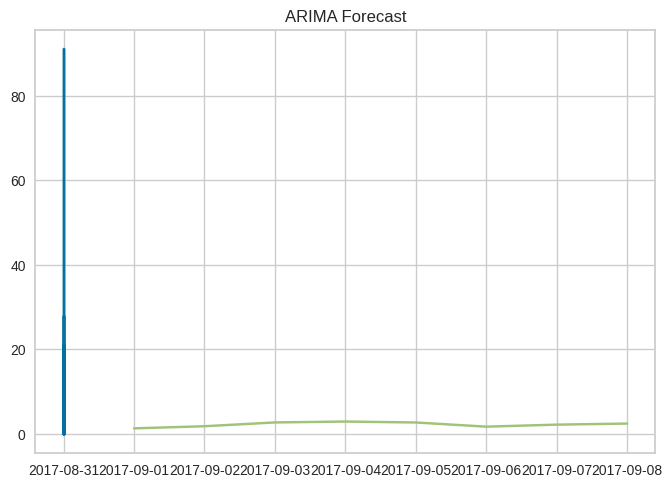

In [83]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit the ARIMA model
model = ARIMA(test_data['onpromotion'], order=(5,1,0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=8)

# Plot the forecasts
plt.plot(test_data.index[-50:], test_data['onpromotion'].iloc[-50:])
plt.plot(pd.date_range(test_data.index[-1], periods=9, closed='right'), forecast[:8])
plt.title('ARIMA Forecast')
plt.show()


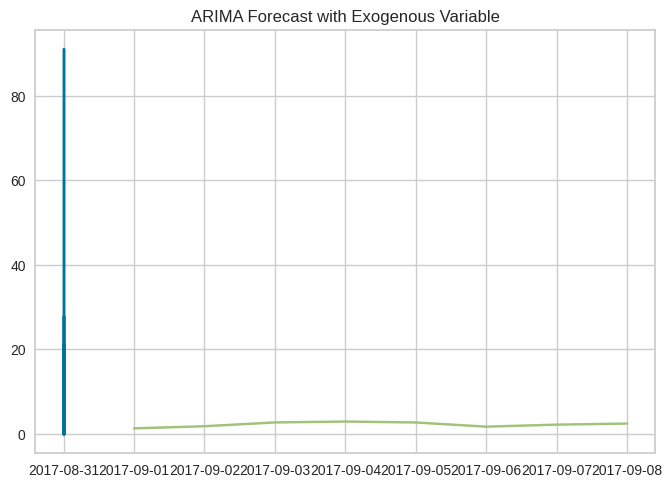

In [94]:
# Fit the ARIMA model with exogenous variable
model_exog = ARIMA(test_data['onpromotion'], exog=test_data[['store_nbr']], order=(5,1,0))
model_fit_exog = model_exog.fit()

# Forecast
forecast_exog = model_fit_exog.forecast(steps=8, exog=test_data[['store_nbr']].iloc[-8:])

# Plot the forecasts
plt.plot(test_data.index[-50:], test_data['onpromotion'].iloc[-50:])
plt.plot(pd.date_range(test_data.index[-1], periods=9, closed='right'), forecast_exog[:8])
plt.title('ARIMA Forecast with Exogenous Variable')
plt.show()
